In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Loading the dataset

In [427]:
df = pd.read_csv("loan_approved (1)(in).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploring data

In [428]:
df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [430]:
 categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 
                    'Self_Employed', 'Property_Area', 'Loan_Status (Approved)']

for col in categorical_cols:
    print(df[col].value_counts())
    print()

Gender
Male      489
Female    112
Name: count, dtype: int64

Married
Yes    398
No     213
Name: count, dtype: int64

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Loan_Status (Approved)
Y    422
N    192
Name: count, dtype: int64



# Replacing Missing values

In [431]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['LoanAmount'].isnull().sum()

0

In [432]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [433]:
df['Gender']=df['Gender'].fillna('Male')#Mode

In [434]:
df['Gender'].isnull().sum()

0

In [435]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])#Categorical data 
df['Married'].isnull().sum()

0

In [436]:
df['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [437]:
df['Dependents'].fillna(df['Dependents'].mode())#Categorical data
df['Dependents'].isnull().sum()

15

In [438]:
df.shape

(614, 13)

In [439]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [440]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [441]:
df['Dependents'].fillna('3+', inplace=True)#replacing with 3+ to increase the difficulty of loan approval
df['Dependents'].isnull().sum()

0

In [442]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [443]:
df['Self_Employed']=df['Self_Employed'].fillna('No')#Mode
df['Self_Employed'].isnull().sum()

0

In [444]:
med = df['Loan_Amount_Term'].median()
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(med)
df['Loan_Amount_Term'].isna().sum()

0

In [445]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [446]:
df.groupby(['Loan_Status (Approved)','Property_Area'])

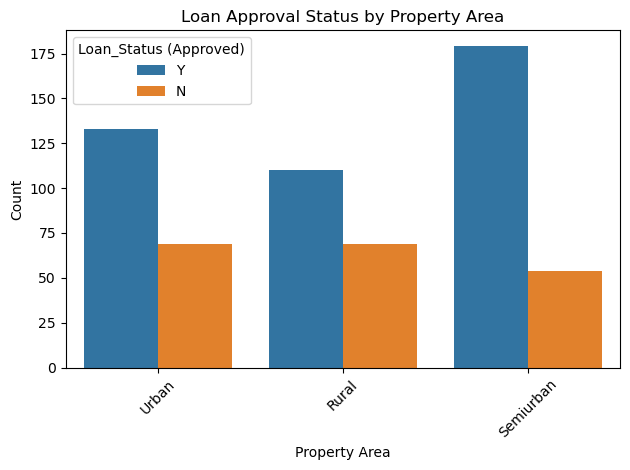

In [447]:
sns.countplot(data=df, x='Property_Area', hue='Loan_Status (Approved)')
plt.title('Loan Approval Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [448]:
df['Property_Area']=df['Property_Area'].fillna("Rural")#use any row for replcement but semiurban because the acceptance rate is very high for semiurban
df['Property_Area'].isnull().sum()

0

In [449]:
df['Credit_History']=df['Credit_History'].fillna('0')
df['Credit_History'].isnull().sum()

0

In [450]:
df.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

# Outliers detection and reduction

In [451]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


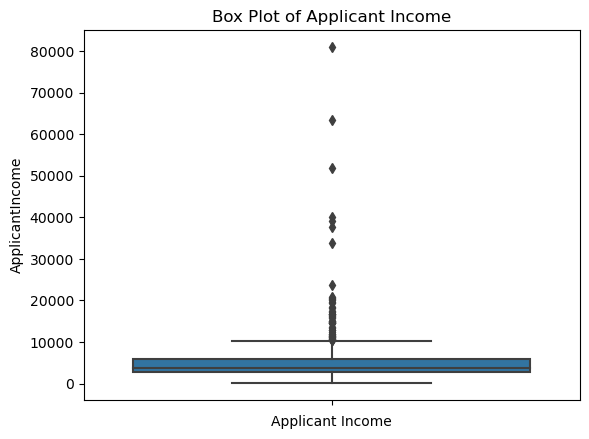

In [452]:
sns.boxplot(y=df['ApplicantIncome'])
plt.title('Box Plot of Applicant Income')
plt.xlabel('Applicant Income')
plt.show()

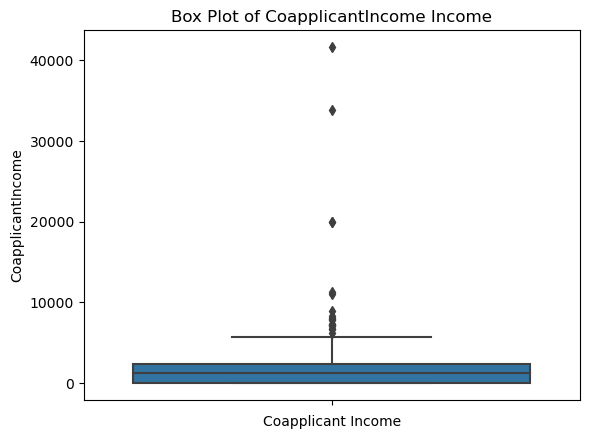

In [453]:
sns.boxplot(y=df['CoapplicantIncome'])
plt.title('Box Plot of CoapplicantIncome Income')
plt.xlabel('Coapplicant Income')
plt.show()

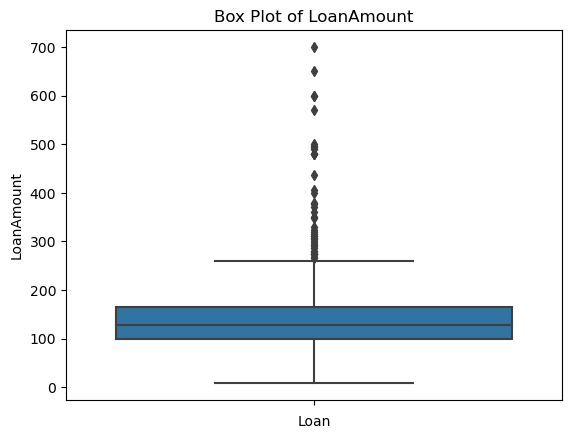

In [454]:
sns.boxplot(y=df['LoanAmount'])
plt.title('Box Plot of LoanAmount')
plt.xlabel('Loan')
plt.show()

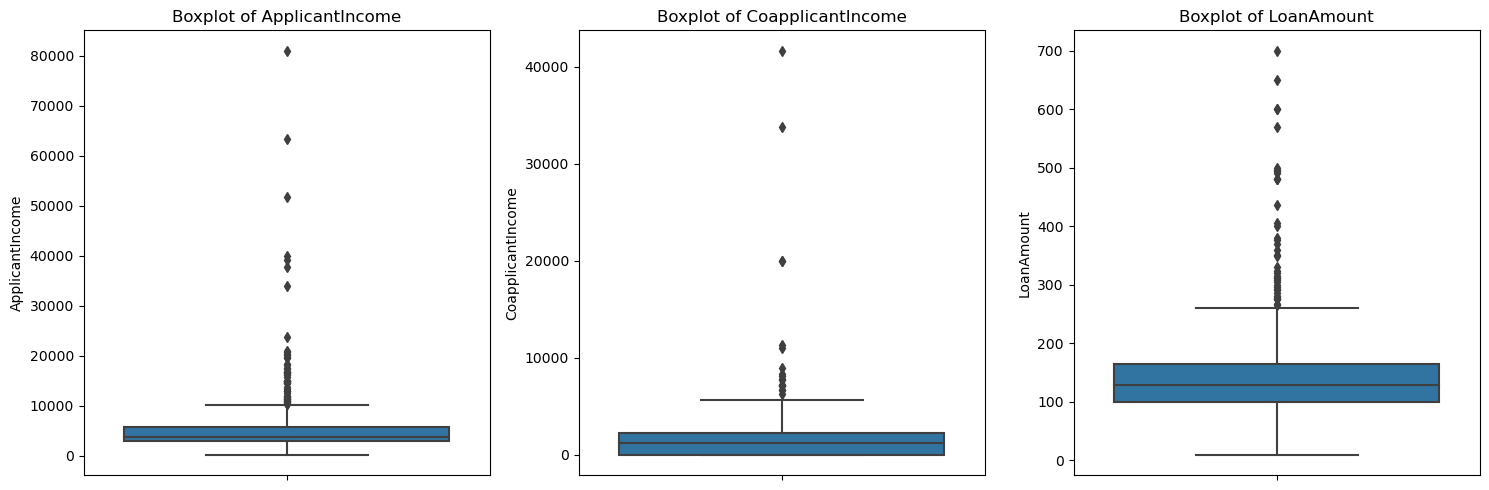

In [455]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

plt.figure(figsize=(15, 5))

for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# IQR

In [456]:
def remove_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [457]:
#df = df.dropna(subset=['LoanAmount'])
df_clean = remove_outliers(df,'LoanAmount')
print(f"Original data shape: {df.shape}")
print(f"Data shape after removing outliers: {df_clean.shape}")

Original data shape: (614, 13)
Data shape after removing outliers: (573, 13)


In [458]:
df_clean=remove_outliers(df_clean,'ApplicantIncome')
print(f"Original data shape: {df.shape}")
print(f"Data shape after removing outliers: {df_clean.shape}")

Original data shape: (614, 13)
Data shape after removing outliers: (529, 13)


In [459]:
df_clean=remove_outliers(df_clean,'CoapplicantIncome')
print(f"Original data shape: {df.shape}")
print(f"Data shape after removing outliers: {df_clean.shape}")

Original data shape: (614, 13)
Data shape after removing outliers: (519, 13)


In [460]:
#columns(outliers) removed using iqr are more

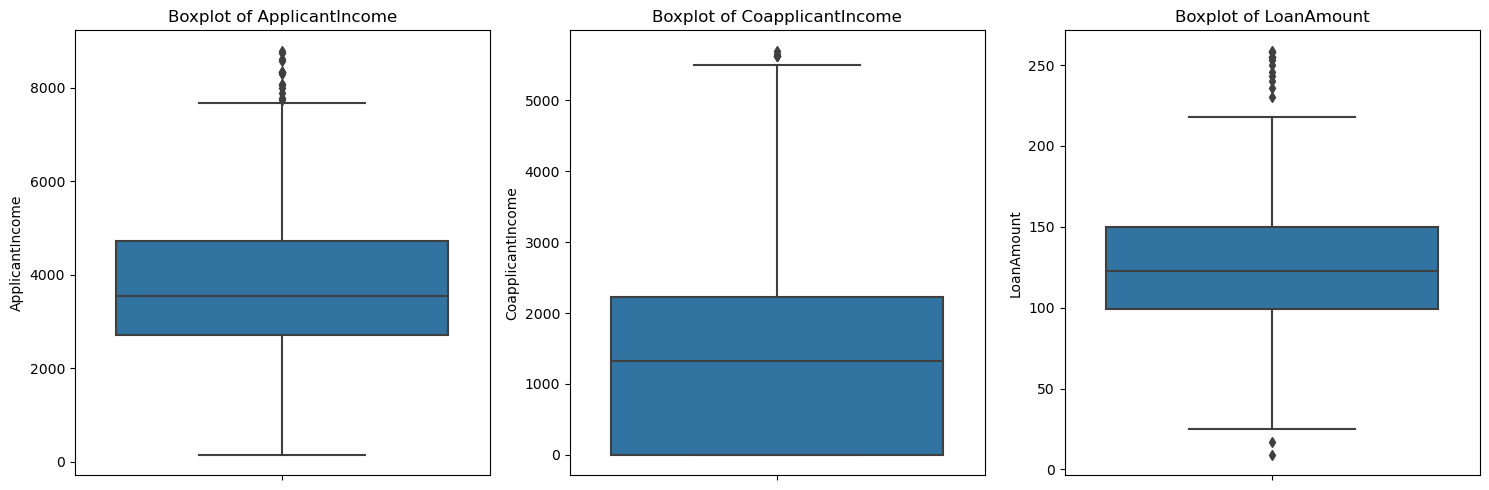

In [461]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

plt.figure(figsize=(15, 5))

for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Z-Score

In [462]:
from scipy.stats import zscore
z_scores = df[['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']].apply(zscore)
threshold = 3
mask = (z_scores.abs() < threshold).all(axis=1)
df_clean = df[mask]
print(f"Original data shape: {df.shape}")
print(f"Data shape after removing outliers: {df_clean.shape}")

Original data shape: (614, 13)
Data shape after removing outliers: (589, 13)


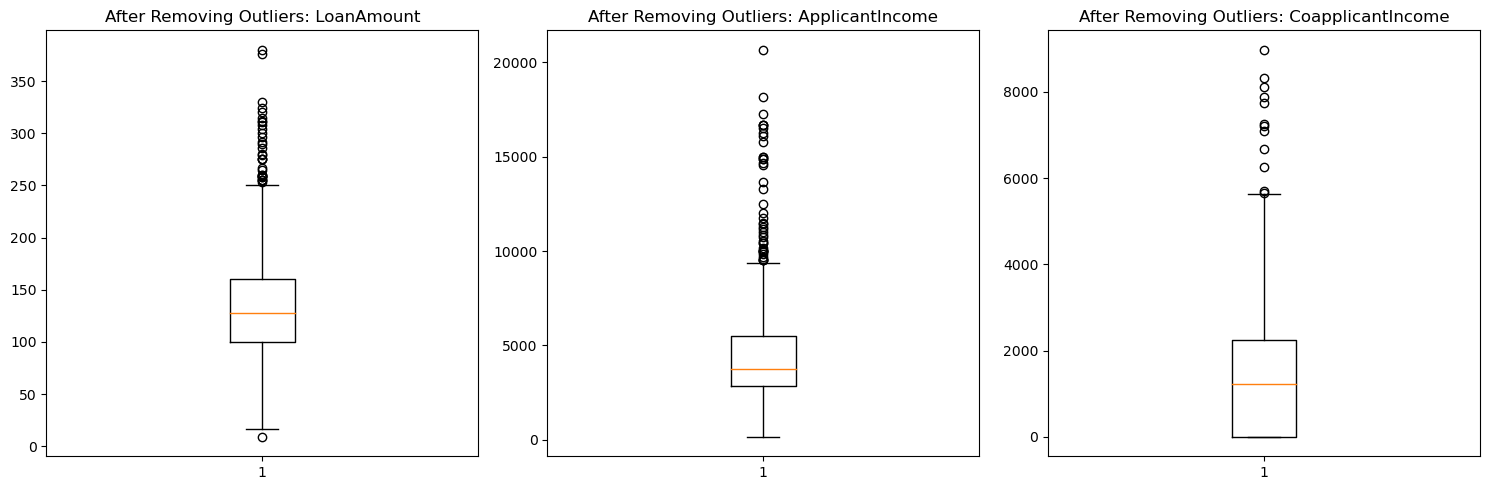

In [463]:
cols = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(df_clean[col])
    plt.title(f'After Removing Outliers: {col}')
plt.tight_layout()
plt.show()

In [464]:
#Columns(outliers) removed using z-score are very less when compared to iqr 

# One Hot Encoding

In [465]:
#pd.get_dummies()

In [466]:
df1=pd.get_dummies(df['Gender'])#df1 is encoder of column Gender
df=pd.concat([df,df1],axis=1).drop(['Gender'],axis=1)

In [467]:
df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Female,Male
0,LP001002,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,False,True
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,False,True
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,False,True
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,False,True
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,False,True


In [468]:
df1=pd.get_dummies(df['Dependents'])#df1 is encoder of column Dependents
df=pd.concat([df,df1],axis=1).drop(['Dependents'],axis=1)


In [469]:
df.head()

,Loan_ID,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Female,Male,0,1,2,3+
0,LP001002,No,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,False,True,True,False,False,False
1,LP001003,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,False,True,False,True,False,False
2,LP001005,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,False,True,True,False,False,False
3,LP001006,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,False,True,True,False,False,False
4,LP001008,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,False,True,True,False,False,False


In [470]:
df2=pd.get_dummies(df['Married'], prefix='Married', drop_first=False)#prefix helps identifing the encoded column by adding the prefix to the column name
df=pd.concat([df,df2], axis=1).drop(['Married'], axis=1)

In [471]:
df.head()

,Loan_ID,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Female,Male,0,1,2,3+,Married_No,Married_Yes
0,LP001002,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,False,True,True,False,False,False,True,False
1,LP001003,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,False,True,False,True,False,False,False,True
2,LP001005,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,False,True,True,False,False,False,False,True
3,LP001006,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,False,True,True,False,False,False,False,True
4,LP001008,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,False,True,True,False,False,False,True,False


# Feature Analysis

In [473]:
from sklearn.model_selection import train_test_split
X = df.drop('Loan_Status (Approved)', axis=1)#All coulmns except target column
y=df['Loan_Status (Approved)']#Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [474]:
X.shape

(614, 17)

In [475]:
y.shape#one-dimensional(single column has rows)

(614,)

In [477]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(['Loan_Status (Approved)', 'Loan_ID'], axis=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'LP001273'